In [41]:
import pandas as pd
base = pd.read_csv('../dataset/dataset_train.csv')
base = base.dropna()

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler_price = MinMaxScaler()
base[['sold_price']] = scaler_price.fit_transform(base[['sold_price']])

In [43]:
base

,negotiation_date,sold_price,product
0,07/01/2014,0.233329,Polpa Cítrica
1,08/01/2014,0.222386,Polpa Cítrica
2,09/01/2014,0.214286,Polpa Cítrica
3,10/01/2014,0.255714,Polpa Cítrica
4,11/01/2014,0.151014,Polpa Cítrica
...,...,...,...
1632,26/07/2019,0.255843,Polpa Cítrica
1633,27/07/2019,0.250000,Polpa Cítrica
1634,29/07/2019,0.228571,Polpa Cítrica
1635,30/07/2019,0.292857,Polpa Cítrica


In [44]:
base = base.iloc[:, 1].values

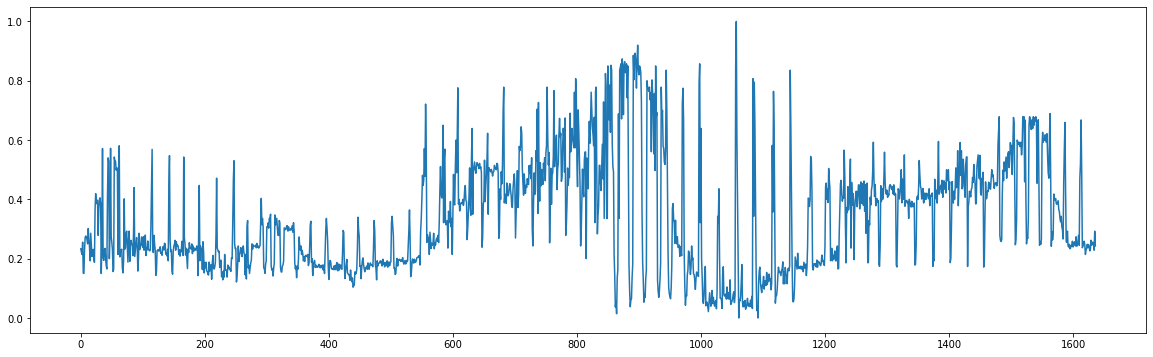

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(base)
plt.show()

In [51]:
periodos = 30 # de quantos em quantos periodos sao os dados ()
previsao_futura = 1 # saber um periodo

X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)
y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)

In [52]:
X_batches.shape, y_batches.shape, X_teste.shape, y_teste.shape

((54, 30, 1), (54, 30, 1), (1, 30, 1), (1, 30, 1))

In [53]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.4.0'

In [56]:
entradas = 1
neuronios_oculta = 200
neuronios_saida = 1

# Usando RNN Simples

In [14]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.rnn = tf.keras.layers.SimpleRNN(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.rnn(inputs)
        x = self.dense(x)

        return x

In [15]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  175275.8580586137
101  erro:  9128.538128536096
201  erro:  6466.67387200086
301  erro:  5369.106641605465
401  erro:  4862.598119824231
501  erro:  4442.523037744295
601  erro:  4159.999798229674
701  erro:  3844.202448019855
801  erro:  3547.9555911986668
901  erro:  3367.4703303029705
1001  erro:  3176.954183687825
1101  erro:  3003.2186605898573
1201  erro:  2804.223333363646
1301  erro:  2818.90628642699
1401  erro:  2680.16584290926
1501  erro:  2480.1392764449233
1601  erro:  2367.0223443870455
1701  erro:  2451.7178594669795
1801  erro:  2270.340355234243
1901  erro:  2188.6958261168206
2001  erro:  2090.541109441147
2101  erro:  2073.1475379645008
2201  erro:  1971.9085168171232
2301  erro:  1950.0792301661709
2401  erro:  1946.5861305580406
2501  erro:  1846.7474539348123
2601  erro:  1839.266170949402
2701  erro:  1979.9646824999847
2801  erro:  1760.5837687989422
2901  erro:  1707.3220734976226
3001  erro:  1680.7990011257803
3101  erro:  1685.385737776619
3201  e

In [16]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[328.8465  ],
        [501.93445 ],
        [474.0973  ],
        [407.0579  ],
        [647.69165 ],
        [322.47736 ],
        [103.76069 ],
        [627.5769  ],
        [760.20374 ],
        [ 57.142414],
        [380.92715 ],
        [882.97546 ],
        [142.97346 ],
        [659.92065 ],
        [317.69626 ],
        [311.524   ],
        [644.055   ],
        [497.20398 ],
        [519.7932  ],
        [497.73495 ],
        [321.73547 ],
        [359.93796 ],
        [714.4293  ],
        [621.1577  ],
        [ 98.97867 ],
        [496.70673 ],
        [492.61658 ],
        [240.96472 ],
        [667.1748  ],
        [374.58148 ]]], dtype=float32)>

In [17]:
import numpy as np
y_teste2 = np.ravel(y_teste)

In [18]:
y_teste2

array([500.  , 613.75, 600.  , 580.  , 314.38, 324.09, 618.  , 372.  ,
       316.88, 320.  , 520.  , 620.  , 609.38, 385.  , 325.  , 559.  ,
       620.  , 527.5 , 360.  , 340.  , 305.  , 532.8 , 609.5 , 487.5 ,
       353.33, 316.67, 350.  , 552.5 , 331.42, 315.  ])

In [19]:
previsoes2 = np.ravel(previsoes.numpy())

In [20]:
previsoes2

array([328.8465  , 501.93445 , 474.0973  , 407.0579  , 647.69165 ,
       322.47736 , 103.76069 , 627.5769  , 760.20374 ,  57.142414,
       380.92715 , 882.97546 , 142.97346 , 659.92065 , 317.69626 ,
       311.524   , 644.055   , 497.20398 , 519.7932  , 497.73495 ,
       321.73547 , 359.93796 , 714.4293  , 621.1577  ,  98.97867 ,
       496.70673 , 492.61658 , 240.96472 , 667.1748  , 374.58148 ],
      dtype=float32)

In [21]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

236.5508045350911


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste2, previsoes2)
mae

195.82769635518392

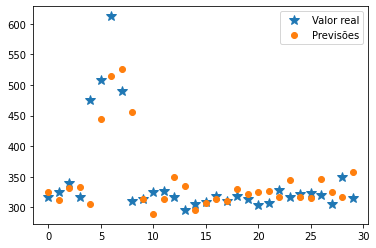

In [116]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

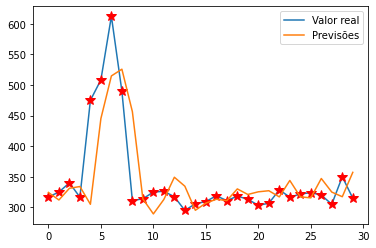

In [117]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

# Usando LSTM

In [57]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = tf.keras.layers.LSTM(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)

        return x

In [58]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  0.12821099418286327
101  erro:  0.016436074689570864
201  erro:  0.012217774434147743
301  erro:  0.010877780925547883
401  erro:  0.010214122178299857
501  erro:  0.009532231409255963
601  erro:  0.008905854968764672
701  erro:  0.008856025956206338
801  erro:  0.008288158764328254
901  erro:  0.007815640504617546


In [37]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[183.55571],
        [227.43977],
        [283.9679 ],
        [339.65768],
        [321.45584],
        [437.08463],
        [505.55325],
        [609.874  ],
        [462.82608],
        [338.61658],
        [387.27893],
        [381.59756],
        [381.28876],
        [374.55234],
        [348.90845],
        [316.84   ],
        [326.92053],
        [254.24867],
        [281.013  ],
        [327.63837],
        [363.31876],
        [311.7096 ],
        [316.54144],
        [343.421  ],
        [305.20728],
        [330.50406],
        [349.28632],
        [320.073  ],
        [321.07687],
        [344.3701 ]]], dtype=float32)>

In [40]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

68.5206398572884


# Múltiplas camadas LSTM

O construtor para empilhar células com estrutura de RNN deve ser `tf.keras.layers.StackedRNNCells`, que depois deve ser consolidada em uma camada usando o construtor `tf.keras.layers.RNN`, conforme exemplo em https://www.tensorflow.org/api_docs/python/tf/keras/layers/StackedRNNCells#examples

In [20]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        lstms = [tf.keras.layers.LSTMCell(units = neuronios_oculta, activation = 'relu') for _ in range(4)]
        stacked_lstm = tf.keras.layers.StackedRNNCells(cells = lstms)
        self.lstm_layer = tf.keras.layers.RNN(cell = stacked_lstm, return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.dense(x)

        return x

In [22]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  152055.5560928092
101  erro:  295129.52800579194
201  erro:  256868.34905078946
301  erro:  101892.224156464
401  erro:  85232.06137499803
501  erro:  56765.44986439875
601  erro:  48851.837506940254
701  erro:  45361.35035529295
801  erro:  42276.08177673545
901  erro:  39342.3225562051


In [23]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[  1.446893 ],
        [  6.2060995],
        [ 18.457214 ],
        [ 43.681637 ],
        [ 86.83233  ],
        [171.53879  ],
        [327.75235  ],
        [372.27393  ],
        [490.0091   ],
        [334.0553   ],
        [298.6773   ],
        [282.51382  ],
        [305.78986  ],
        [323.59402  ],
        [354.22556  ],
        [401.7959   ],
        [343.3736   ],
        [221.7705   ],
        [309.18375  ],
        [333.68802  ],
        [321.89053  ],
        [329.2971   ],
        [293.66785  ],
        [429.26385  ],
        [283.22623  ],
        [350.64972  ],
        [310.2443   ],
        [423.87073  ],
        [407.5404   ],
        [379.20126  ]]], dtype=float32)>

In [ ]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

In [24]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

115.12174163532258

In [ ]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))